In [1]:
import re
from bs4 import BeautifulSoup
from urllib import request
from nltk.tokenize import word_tokenize,sent_tokenize

url1 = "https://en.wikipedia.org/wiki/Web_mining"
html1 = request.urlopen(url1).read().decode('utf8')
raw_web_mining = BeautifulSoup(html1, 'html.parser').get_text()

url2 = "https://en.wikipedia.org/wiki/Data_mining"
html2 = request.urlopen(url2).read().decode('utf8')
raw_data_mining = BeautifulSoup(html2, 'html.parser').get_text()


wb_sentences =  sent_tokenize(raw_web_mining)
data_sentences = sent_tokenize(raw_data_mining)

set_web = set(word_tokenize(raw_web_mining))
set_data = set(word_tokenize(raw_data_mining))

In [2]:
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = set(STOP_WORDS)
stop_words_mod = stop_words.union({'.',',','\'','\"','?','{','}','[',']','<','>','(',')','!'})

stop_web = set_web.difference(stop_words_mod)
stop_data = set_data.difference(stop_words_mod)

def maker(name, ls):
    with open(name,'w') as f:
        for item in list(ls):
            try:
                f.write('%s\n'%item)
            except:
                pass # to remove non-unicode characters


maker('web.txt',stop_web)
maker('data.txt',stop_data)

In [3]:
from nltk import pos_tag
def stopWordMaker(sentences):
    map_final = {}
    collection_stop = []
    collection_pos = []
    for sentence in sentences:
        sentence_ls = sentence.split()
        for word in sentence_ls:
            if word in list(stop_words):
                collection_stop.append(word)
                collection_pos.append(pos_tag([word])[0][1])
        map_final[sentence] = [collection_stop,collection_pos]
        collection_stop = []
        collection_pos = []
    return map_final

map_web = stopWordMaker(wb_sentences)
map_data = stopWordMaker(data_sentences)

In [4]:
import pandas as pd
posTagFrame1 = pd.DataFrame({
    'Original Sentence': [list(i)[0] for i in map_web.items()],
    'List of StopWords' : [list(i)[1][0] for i in map_web.items()],
    'POS-Tag' : [list(i)[1][1] for i in map_web.items()]})
posTagFrame1

,Original Sentence,List of StopWords,POS-Tag
0,\n\n\n\nWeb mining - Wikipedia\n\n\n\n\n\n\n\n...,"[the, to, to, a, of, or, but, its, because, it]","[DT, TO, TO, DT, IN, CC, CC, PRP$, IN, PRP]"
1,Please help to improve this article by introdu...,"[to, this, by, more]","[TO, DT, IN, RBR]"
2,(October 2020) (Learn how and when to remove t...,"[how, and, when, to, this, may, to]","[WRB, CC, WRB, TO, DT, MD, TO]"
3,The specific problem is: The article needs suf...,"[and, a, has, been]","[CC, DT, VBZ, VBN]"
4,Please help improve this article if you can.,"[this, if, you]","[DT, IN, PRP]"
...,...,...,...
160,"Retrieved from ""https://en.wikipedia.org/w/ind...","[from, from, from, with, a, from, from, to, be...","[IN, IN, IN, IN, DT, IN, IN, TO, VB, IN, TO, V..."
161,Text is available under the Creative Commons A...,"[is, under, the, may]","[VBZ, IN, DT, MD]"
162,"By using this site, you agree to the Terms of ...","[using, this, you, to, the, of, and]","[VBG, DT, PRP, TO, DT, IN, CC]"
163,Wikipedia® is a registered trademark of the Wi...,"[is, a, of, the, a]","[VBZ, DT, IN, DT, DT]"


In [5]:
posTagFrame2 = pd.DataFrame({
    'Original Sentence': [list(i)[0] for i in map_data.items()],
    'List of StopWords' : [list(i)[1][0] for i in map_data.items()],
    'POS-Tag' : [list(i)[1][1] for i in map_data.items()]})
posTagFrame2

,Original Sentence,List of StopWords,POS-Tag
0,\n\n\n\nData mining - Wikipedia\n\n\n\n\n\n\n\...,"[the, to, to, in, using, of, a, to, of, of, of...","[DT, TO, TO, IN, VBG, IN, DT, TO, IN, IN, IN, ..."
1,[1] Data mining is an interdisciplinary subfie...,"[is, an, of, and, with, an, to, from, a, and, ...","[VBZ, DT, IN, CC, IN, DT, TO, IN, DT, CC, DT, ..."
2,[1][2][3][4] Data mining is the analysis step ...,"[is, the, of, the, in, or]","[VBZ, DT, IN, DT, IN, CC]"
3,"[5] Aside from the raw analysis step, it also ...","[from, the, it, also, and, and, of, and]","[IN, DT, PRP, RB, CC, CC, IN, CC]"
4,"[1]\nThe term ""data mining"" is a misnomer, bec...","[is, a, because, the, is, the, of, and, from, ...","[VBZ, DT, IN, DT, VBZ, DT, IN, CC, IN, IN, RB,..."
...,...,...,...
311,Knowledge Discovery Software at Curlie\nData M...,"[at, at, a, a, for, of, and, their, the, on, o...","[IN, IN, DT, DT, IN, IN, CC, PRP$, DT, IN, IN,..."
312,Text is available under the Creative Commons A...,"[is, under, the, may]","[VBZ, IN, DT, MD]"
313,"By using this site, you agree to the Terms of ...","[using, this, you, to, the, of, and]","[VBG, DT, PRP, TO, DT, IN, CC]"
314,Wikipedia® is a registered trademark of the Wi...,"[is, a, of, the, a]","[VBZ, DT, IN, DT, DT]"


In [6]:
def counter(data):
    ls = []
    for i in terms:
        ls.append(data.count(i))
    return ls

terms = set_data.union(set_web)
Term_Document_BagOfWords = pd.DataFrame({
    "Terms" : list(terms),
    "Doc 1" : counter(list(word_tokenize(raw_web_mining))),
    "Doc 2" : counter(list(word_tokenize(raw_data_mining))),
})
Term_Document_BagOfWords

,Terms,Doc 1,Doc 2
0,avoided,1,0
1,but,5,7
2,engineering,0,4
3,Formal,0,2
4,frequent,1,0
...,...,...,...
2955,insight,1,0
2956,raw,0,1
2957,Scime,1,0
2958,NeurIPS,0,1


In [7]:
def boolean(data):
    ls = []
    for i in list(terms):
        if i in data:
            ls.append(1)
        else:
            ls.append(0)
    return ls 

data_frame_bool = pd.DataFrame({
    'Terms' : list(terms),
    'Doc 1' : boolean(list(word_tokenize(raw_web_mining))),
    'Doc 2' : boolean(list(word_tokenize(raw_data_mining)))
})

data_frame_bool

,Terms,Doc 1,Doc 2
0,avoided,1,0
1,but,1,1
2,engineering,0,1
3,Formal,0,1
4,frequent,1,0
...,...,...,...
2955,insight,1,0
2956,raw,0,1
2957,Scime,1,0
2958,NeurIPS,0,1


In [8]:
def index_finder(data):
    ls = []
    for i in list(terms):
        ls_temp = [index for index, element in enumerate(data) if element == i]
        ls.append(ls_temp)
    return ls

data_frame_complete = pd.DataFrame({
    'Terms' : list(terms),
    'Doc 1' : index_finder(list(word_tokenize(raw_web_mining))),
    'Doc 2' : index_finder(list(word_tokenize(raw_data_mining)))
})

data_frame_complete

,Terms,Doc 1,Doc 2
0,avoided,[1496],[]
1,but,"[32, 1139, 1393, 1598, 1888]","[702, 1071, 2133, 2187, 2684, 3004, 3032]"
2,engineering,[],"[49, 4151, 4541, 7144]"
3,Formal,[],"[6963, 7043]"
4,frequent,[544],[]
...,...,...,...
2955,insight,[922],[]
2956,raw,[],[336]
2957,Scime,[2616],[]
2958,NeurIPS,[],[202]


In [9]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language='english')

cache_for_queries_1 = [stemmer.stem(w) for w in list(set(word_tokenize(raw_web_mining)).difference(stop_words_mod))]

cache_for_queries_2 = [stemmer.stem(w) for w in list(set(word_tokenize(raw_data_mining)).difference(stop_words_mod))]

In [10]:
def query_responder():
    query = input()
    tokens = [stemmer.stem(i) for i in list(set(word_tokenize(query)).difference(stop_words_mod))]
    count1 = []
    count2 = []
    for i in tokens:
        if i in cache_for_queries_1:
            count1.append(cache_for_queries_1.count(i))
        else:
            count1.append(0)
        if i in cache_for_queries_2:
            count2.append(cache_for_queries_2.count(i))
        else:
            count2.append(0)
    df = pd.DataFrame({
        "Tokens" : tokens,
        "Doc1 count" : count1,
        "Doc2 count" : count2,
    })
    if (sum(count1)>sum(count2)):
        print("Doc 1")
        print("Doc 2")
    else:
        print("Doc 2")
        print("Doc 1")
    return df

In [11]:
# the query is "Machine Learning is nice thing to do"
query_responder()

Doc 2
Doc 1


,Tokens,Doc1 count,Doc2 count
0,nice,0,0
1,machin,1,3
2,thing,0,0
3,learn,3,3


In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def chart_generator(data):
    chart = WordCloud(width = 3000, height = 3000, margin = 0).generate(data)
    plt.imshow(chart)
    plt.axis("off")
    plt.margins(x = 0, y = 0)
    plt.show() 

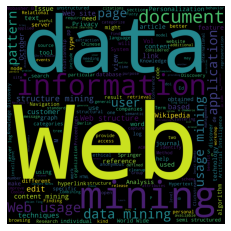

In [13]:
chart_generator(raw_web_mining)

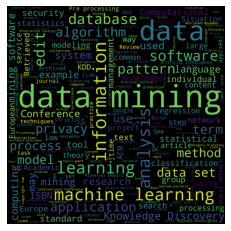

In [14]:
chart_generator(raw_data_mining)

In [15]:
from nltk.corpus import wordnet

def custom_pos(tag):
    if tag.startswith('NN'):
        return wordnet.NOUN
    elif tag.startswith('VB'):
        return wordnet.VERB

def synonyms(word, tag):
    ls = [ss.lemmas() for ss in wordnet.synsets(word, custom_pos(tag))]
    lemma = [lemma.name() for lemma in sum(ls, [])]
    return set(lemma)

def synonyms_maker(value):
    pos_tokens = pos_tag(word_tokenize(value))
    # checking if words are changable or not
    for (word,tag) in pos_tokens:
        if tag.startswith('NN') or tag.startswith('VB') or tag.startswith('JJ'):
            synonym = synonyms(word,tag)
            # checking if list exists or not
            if synonym:
                if len(synonym) > 1:
                    yield [word,list(synonym)]
                continue
            yield [word,[]]
        else:
            yield [word,[]]
    
def paraphrase_tokenizer(data):
    return [x for x in synonyms_maker(data)]

from random import randint

def paraphraser(sentence):
    ls = paraphrase_tokenizer(sentence)
    ls_str =[]
    # index = 0
    # index_record = []
    temp1 =""
    temp2 =""
    temp3 =""
    putunc_1 = ["."]
    putunc_2 = [","]
    for i in ls:
        flag = True
        if len(i[1]) != 0:
            try:
                i[1].remove(i[0])
            except:
                pass
            num1 = randint(0,len(i[1])-1)
            temp1 += i[1][num1]

            num2 = randint(0,len(i[1])-1)
            while num2 == num1:
                num2 = randint(0,len(i[1])-1)
            temp2 += i[1][num2]
            
            num3 = randint(0,len(i[1])-1)
            while num3 == num2:
                num3 = randint(0,len(i[1])-1)
            temp3 += i[1][num3]

        elif len(i[1]) == 0 and i[0] not in putunc_1 and i[0] not in putunc_2:
            temp1 += i[0]
            temp2 += i[0]
            temp3 += i[0]
        temp1+=" "
        temp2+=" "
        temp3+=" "
        
        if i[0] in putunc_1:
            temp1 = temp1.rstrip() + i[0]
            temp2 = temp2.rstrip() + i[0]
            temp3 = temp3.rstrip() + i[0]
        elif i[0] in putunc_2:
            temp1 = temp1.rstrip() + i[0]
            temp2 = temp2.rstrip() + i[0]
            temp3 = temp3.rstrip() + i[0]
            temp1 += " "
            temp2 += " "
            temp3 += " "

    print(temp1)
    print(temp2)
    print(temp3)

In [16]:
paraphraser("The quick brown fox jumps over the lazy dog")

The agile John_Brown slyboots stick_out over the faineant click 
The prompt Robert_Brown Charles_James_Fox jump_out over the slothful blackguard 
The quickly John_Brown Fox chute over the otiose frump 


In [17]:
paraphraser("We can rewrite history as much as we like.")

We can account as much as we care.
We can story as much as we wish.
We can account as much as we care.


In [18]:
paraphraser("Once you know all the elements, it’s not difficult to pull together a sentence.")

Once you live all the chemical_element, it ’ s not unmanageable to attract together a time.
Once you jazz all the component, it ’ s not hard to root_for together a judgment_of_conviction.
Once you do_it all the element, it ’ s not unmanageable to pluck together a condemnation.
